#Prepare Enviornment & Import Customized Python Module

from google.colab import drive
drive.mount('/content/drive')

cd /content/drive/MyDrive/Carol_Copy/PointingShortcutting/ImmersiveVR

 Volume in drive C has no label.
 Volume Serial Number is EE66-681F

 Directory of C:\Users\error\WorkSpace\HegartyLab\ConfiguralSpatialKnowledgeMeasurement\ImmersiveMaze

05/09/2023  05:42 PM    <DIR>          .
05/09/2023  05:42 PM    <DIR>          ..
05/09/2023  01:05 PM             4,589 Desktop_Performance.csv
05/09/2023  05:40 PM    <DIR>          dsp_py_module
05/09/2023  01:05 PM           311,495 immersive_VR_main_Analysis.ipynb
05/09/2023  05:42 PM            66,430 immersive_VR_processs_raw_data.ipynb
05/09/2023  01:05 PM           311,495 immersive_VR_supplemental_Analysis.ipynb
05/09/2023  01:05 PM    <DIR>          Pointing-Phase1
05/09/2023  01:05 PM    <DIR>          Pointing-Phase2
05/09/2023  01:05 PM    <DIR>          ProcessedData
05/09/2023  01:05 PM    <DIR>          Shortcutting
05/09/2023  01:05 PM             5,736 strategy.csv
05/09/2023  01:05 PM             1,738 trial_info.csv
               6 File(s)        701,483 bytes
               7 Dir(s)  756,680,1

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dsp_py_module import WayFindingTxtVerifier
from dsp_py_module import WayFindingTrajectory
from dsp_py_module import WayFindingAnalyzer
from dsp_py_module import Pointing

# Processing Pointing Data

In [ ]:
data_path = "/content/drive/MyDrive/Carol_Copy/PointingShortcutting/ImmersiveVR/Pointing-Phase1"
pp1 = Pointing(data_path)
pp1.save("ProcessedData/pointingPhase1.csv")

data_path = "/content/drive/MyDrive/Carol_Copy/PointingShortcutting/ImmersiveVR/Pointing-Phase2"
pp2 = Pointing(data_path)
pp2.save("ProcessedData/pointingPhase2.csv")

# Processing Shortcutting Data

In [ ]:
data_path = "/content/drive/MyDrive/Carol_Copy/PointingShortcutting/ImmersiveVR/Shortcutting"
## get successful rate and response time for each trial
txt = WayFindingTxtVerifier(data_path)
txt.save("ProcessedData/time.csv")

## get trajectory (coordinate files) for each trial
trajectory = WayFindingTrajectory('trial_info.csv',data_path)
trajectory.clean_data_w_reboot()
trajectory.combineTrajectory()
trajectory.save_raw("ProcessedData/raw_trajectory.csv")
## Process the trajecotries to correct for smoothness and checking starting and ending locations
trajectory.processTrajectory()
trajectory.save_processed("ProcessedData/processed_trajectory.csv")

## get traveled distance and grid distance for each trial
# analyzer = WayFindingAnalyzer('ProcessedData/processed_trajectory.csv',data_path)
# analyzer.analyze()
# analyzer.save("ProcessedData/analyzed_trajectory.csv")

# Check & Plot Trajectories

In [ ]:
traj_post = pd.read_csv("ProcessedData/processed_trajectory.csv")
strategy = pd.read_csv("strategy.csv")
wftime = pd.read_csv("ProcessedData/time.csv")
wftrajc = pd.read_csv("ProcessedData/analyzed_trajectory.csv")
performance = wftrajc.merge(wftime, how = 'left', on=['ParticipantID','TrialNumber'])

def get_sample(strategy,performance,trial,target):
  sample = strategy[strategy['Trial'+str(trial)]==target].Subject.to_list()
  tmp = performance[(performance.Status=='Success') \
                     & (performance.TrialNumber == trial) \
                     & (performance.ParticipantID.isin(sample))][['ParticipantID','LevelDistanceTraveled','grid_distance','human_distance']]
  return tmp


In [ ]:
sample_results = get_sample(strategy,performance,8,'learned').sort_values(by=['LevelDistanceTraveled','grid_distance','ParticipantID'])
sample_results

,ParticipantID,LevelDistanceTraveled,grid_distance,human_distance
799,443,15.48,18.4,15.53


In [ ]:
traj_post[(traj_post.TrialNum ==24) & (traj_post.SubjectNum==438)]

,SubjectNum,TrialNum,Time,X,Z,X_d,Z_d
11274,438,24,341.0,1.081632,-3.221322,0.799805,-3.099609
11275,438,24,341.0,1.230271,-3.128129,1.599609,-3.099609
11276,438,24,342.0,1.536593,-2.922919,1.599609,-3.099609
11277,438,24,343.0,1.923062,-2.516510,1.599609,-3.099609
11278,438,24,343.0,1.979146,-2.376094,1.599609,-2.000000
11279,438,24,343.0,2.007201,-2.237605,2.500000,-2.000000
11280,438,24,344.0,1.955934,-1.799817,1.599609,-2.000000
11281,438,24,344.0,2.041816,-1.523038,2.500000,-2.000000
11282,438,24,344.0,2.085891,-1.389362,2.500000,-1.000000
11283,438,24,345.0,2.124309,-1.255756,2.500000,-1.000000


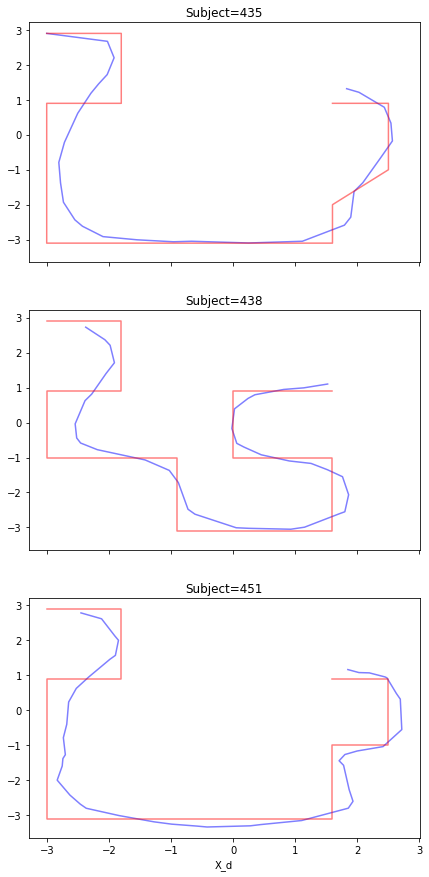

In [ ]:
plotnum = sample_results.ParticipantID.nunique()
grouped = traj_post[(traj_post.TrialNum ==9) & (traj_post.SubjectNum.isin(sample_results.ParticipantID.to_list()))].groupby('SubjectNum')
fig, axs = plt.subplots(plotnum,figsize=(7,5*plotnum),sharex=True, sharey=True)
i=0
for key, gp in grouped:
  gp.plot(ax=axs[i],x='X',y='Z',color ='blue',alpha = 0.5)
  gp.plot(ax=axs[i],x='X_d',y='Z_d',color ='red',alpha = 0.5)
  axs[i].set_title('Subject=%s'%key)
  axs[i].get_legend().remove()
  i=i+1
plt.show()